<!-- -*- coding: utf-8 -*- -->
## Tutorial

This guide can help you start working with NetworkX.

### Creating a graph

Create an empty graph with no nodes and no edges.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import seaborn as sns


In [4]:
import pandas as pd 

In [5]:
df_all=pd.read_csv('sheep_age_weight.csv')

In [6]:
df_all.head()

source  target  weight  Age source  Age_target
0       1       2       1           8           8
1       1       3       1           8           4
2       1       4       1           8           7
3       1       5       1           8           8
4       1       6       1           8           3

In [7]:
dfx=df_all.groupby(['Age source','Age_target']).sum()['weight']

In [8]:
dfx=pd.pivot_table(df_all,index=['Age source'],values=['weight'],
               columns=['Age_target'],aggfunc=[np.sum])

In [9]:
dfy=pd.DataFrame(dfx.to_records())


In [10]:
dfy=dfy.set_index(dfy['Age source'])
dfy.index.names = ['Age of Attacker(winner)']
del dfy['Age source']

In [11]:
dfy.head()

('sum', 'weight', 1)  ('sum', 'weight', 3)  \
Age of Attacker(winner)                                               
1                                        34.0                  61.0   
3                                         NaN                  22.0   
4                                        32.0                  34.0   
5                                        10.0                   5.0   
6                                         3.0                   3.0   

                         ('sum', 'weight', 4)  ('sum', 'weight', 5)  \
Age of Attacker(winner)                                               
1                                        31.0                   NaN   
3                                         NaN                   NaN   
4                                        14.0                   NaN   
5                                        11.0                   NaN   
6                                         3.0                   NaN   

                         ('sum', 'weight', 6)  ('sum', 'weight', 7)  \
Age of Attacker(winner)                                               
1                                         1.0                  31.0   
3                                         NaN                   NaN   
4                                         NaN                  28.0   
5                                         1.0                   4.0   
6                                         NaN                   2.0   

                         ('sum', 'weight', 8)  ('sum', 'weight', 9)  
Age of Attacker(winner)                                              
1                                         NaN                  14.0  
3                                         NaN                   NaN  
4                                         5.0                  28.0  
5                                         NaN                  12.0  
6                                         1.0                   2.0

In [12]:
dfy.columns=[ 1,3,4,5,6,7,8,9]

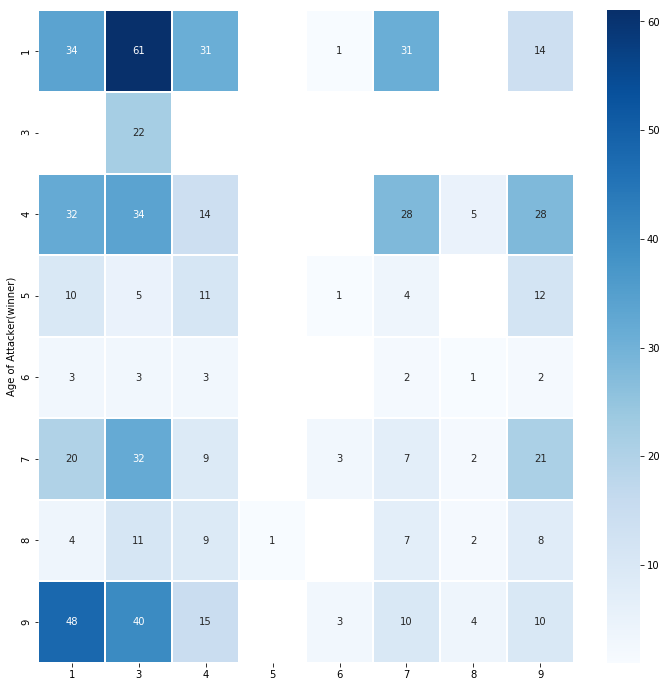

In [13]:
import seaborn as sns
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfy,cmap="Blues",annot=True, linewidths=.9, ax=ax)

## X-axis age of attacked ,Y-axis Age  of attacker ( winners)